In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import streamlit as st
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier

In [2]:
data=pd.read_csv(r"C:\Users\buset\Downloads\lung_cancer_mortality_data_large_v2.csv")

In [3]:
data

,id,age,gender,country,diagnosis_date,cancer_stage,beginning_of_treatment_date,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived
0,1,64.0,Female,Germany,2016-04-07,Stage III,2016-04-21,No,Never Smoked,31.1,257,1,1,0,0,Combined,2017-11-15,0
1,2,50.0,Male,Czech Republic,2023-04-22,Stage III,2023-05-02,Yes,Passive Smoker,25.9,208,1,0,0,0,Radiation,2024-04-25,0
2,3,65.0,Male,Romania,2023-04-07,Stage IV,2023-04-12,No,Never Smoked,18.9,193,0,0,0,0,Surgery,2025-03-11,0
3,4,51.0,Female,Latvia,2016-02-07,Stage III,2016-02-13,Yes,Former Smoker,34.6,249,1,1,1,0,Surgery,2017-04-14,1
4,5,37.0,Male,Greece,2023-12-01,Stage I,2023-12-03,Yes,Never Smoked,40.2,262,0,0,0,0,Chemotherapy,2024-09-20,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3249995,3249996,45.0,Male,Poland,2020-03-11,Stage IV,2020-03-18,No,Current Smoker,31.0,273,1,1,0,0,Chemotherapy,2020-11-26,1
3249996,3249997,51.0,Male,Italy,2016-11-16,Stage IV,2016-11-22,Yes,Current Smoker,41.2,279,1,1,0,0,Surgery,2018-04-10,0
3249997,3249998,45.0,Male,Finland,2021-07-18,Stage III,2021-07-30,Yes,Current Smoker,18.2,187,1,1,0,0,Combined,2022-03-16,0
3249998,3249999,45.0,Male,Hungary,2020-07-25,Stage I,2020-07-30,No,Passive Smoker,40.2,271,1,0,0,0,Surgery,2022-02-28,0


In [4]:
data.columns = data.columns.str.strip()

In [5]:
print(data.head())
print("\nColumns in the dataset:\n", list(data.columns))

   id   age  gender         country diagnosis_date cancer_stage  \
0   1  64.0  Female         Germany     2016-04-07    Stage III   
1   2  50.0    Male  Czech Republic     2023-04-22    Stage III   
2   3  65.0    Male         Romania     2023-04-07     Stage IV   
3   4  51.0  Female          Latvia     2016-02-07    Stage III   
4   5  37.0    Male          Greece     2023-12-01      Stage I   

  beginning_of_treatment_date family_history  smoking_status   bmi  \
0                  2016-04-21             No    Never Smoked  31.1   
1                  2023-05-02            Yes  Passive Smoker  25.9   
2                  2023-04-12             No    Never Smoked  18.9   
3                  2016-02-13            Yes   Former Smoker  34.6   
4                  2023-12-03            Yes    Never Smoked  40.2   

   cholesterol_level  hypertension  asthma  cirrhosis  other_cancer  \
0                257             1       1          0             0   
1                208             1

In [6]:
missing_values = data.isnull().sum()
print("\nMissing Values:\n", missing_values[missing_values > 0])


Missing Values:
 Series([], dtype: int64)


In [7]:
for col in data.select_dtypes(include=['object']).columns:
    data[col] = data[col].fillna(data[col].mode()[0])

In [8]:
for col in data.select_dtypes(include=['number']).columns:
    data[col] = data[col].fillna(data[col].median())

In [9]:
categorical_cols = ['gender', 'country', 'cancer_stage', 'family_history', 'smoking_status', 'treatment_type']
binary_cols = ['gender', 'family_history', 'smoking_status']
one_hot_cols = ['country', 'treatment_type']

In [10]:
categorical_cols

['gender',
 'country',
 'cancer_stage',
 'family_history',
 'smoking_status',
 'treatment_type']

In [11]:
binary_cols

['gender', 'family_history', 'smoking_status']

In [12]:
one_hot_cols

['country', 'treatment_type']

In [13]:
le = LabelEncoder()
for col in binary_cols:
    if col in data.columns:
        data[col] = le.fit_transform(data[col])


In [14]:
data = pd.get_dummies(data, columns=one_hot_cols, drop_first=True)

In [15]:
data

,id,age,gender,diagnosis_date,cancer_stage,beginning_of_treatment_date,family_history,smoking_status,bmi,cholesterol_level,...,country_Poland,country_Portugal,country_Romania,country_Slovakia,country_Slovenia,country_Spain,country_Sweden,treatment_type_Combined,treatment_type_Radiation,treatment_type_Surgery
0,1,64.0,0,2016-04-07,Stage III,2016-04-21,0,2,31.1,257,...,False,False,False,False,False,False,False,True,False,False
1,2,50.0,1,2023-04-22,Stage III,2023-05-02,1,3,25.9,208,...,False,False,False,False,False,False,False,False,True,False
2,3,65.0,1,2023-04-07,Stage IV,2023-04-12,0,2,18.9,193,...,False,False,True,False,False,False,False,False,False,True
3,4,51.0,0,2016-02-07,Stage III,2016-02-13,1,1,34.6,249,...,False,False,False,False,False,False,False,False,False,True
4,5,37.0,1,2023-12-01,Stage I,2023-12-03,1,2,40.2,262,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3249995,3249996,45.0,1,2020-03-11,Stage IV,2020-03-18,0,0,31.0,273,...,True,False,False,False,False,False,False,False,False,False
3249996,3249997,51.0,1,2016-11-16,Stage IV,2016-11-22,1,0,41.2,279,...,False,False,False,False,False,False,False,False,False,True
3249997,3249998,45.0,1,2021-07-18,Stage III,2021-07-30,1,0,18.2,187,...,False,False,False,False,False,False,False,True,False,False
3249998,3249999,45.0,1,2020-07-25,Stage I,2020-07-30,0,3,40.2,271,...,False,False,False,False,False,False,False,False,False,True


In [16]:
if 'cancer_stage' in data.columns:
    data = pd.get_dummies(data, columns=['cancer_stage'], prefix='stage', drop_first=True)
else:
    raise ValueError("Error: 'cancer_stage' column is missing from the dataset.")

In [17]:
numerical_cols = ['age', 'bmi', 'cholesterol_level', 'hypertension', 'asthma', 'cirrhosis', 'other_cancer']

In [18]:
scaler = StandardScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

In [19]:
X = data.drop(columns=['id', 'diagnosis_date', 'beginning_of_treatment_date', 'end_treatment_date', 'survived'], errors='ignore')

In [20]:
X

,age,gender,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,...,country_Slovakia,country_Slovenia,country_Spain,country_Sweden,treatment_type_Combined,treatment_type_Radiation,treatment_type_Surgery,stage_Stage II,stage_Stage III,stage_Stage IV
0,0.899921,0,0,2,0.072537,0.537704,0.577600,1.064628,-0.541261,-0.310683,...,False,False,False,False,True,False,False,False,True,False
1,-0.499908,1,1,3,-0.548619,-0.590068,0.577600,-0.939295,-0.541261,-0.310683,...,False,False,False,False,False,True,False,False,True,False
2,0.999909,1,0,2,-1.384790,-0.935305,-1.731301,-0.939295,-0.541261,-0.310683,...,False,False,False,False,False,False,True,False,False,True
3,-0.399921,0,1,1,0.490622,0.353578,0.577600,1.064628,1.847537,-0.310683,...,False,False,False,False,False,False,True,False,True,False
4,-1.799750,1,1,2,1.159559,0.652782,-1.731301,-0.939295,-0.541261,-0.310683,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3249995,-0.999847,1,0,0,0.060591,0.905956,0.577600,1.064628,-0.541261,-0.310683,...,False,False,False,False,False,False,False,False,False,True
3249996,-0.399921,1,1,0,1.279012,1.044050,0.577600,1.064628,-0.541261,-0.310683,...,False,False,False,False,False,False,True,False,False,True
3249997,-0.999847,1,1,0,-1.468407,-1.073399,0.577600,1.064628,-0.541261,-0.310683,...,False,False,False,False,True,False,False,False,True,False
3249998,-0.999847,1,0,3,1.159559,0.859924,0.577600,-0.939295,-0.541261,-0.310683,...,False,False,False,False,False,False,True,False,False,False


In [21]:
target_cols = [col for col in data.columns if 'stage_' in col]
if target_cols:
    y = data[target_cols].idxmax(axis=1)  # Convert one-hot encoded target back to categorical labels
else:
    raise ValueError("Target variable 'cancer_stage' not found after encoding.")

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

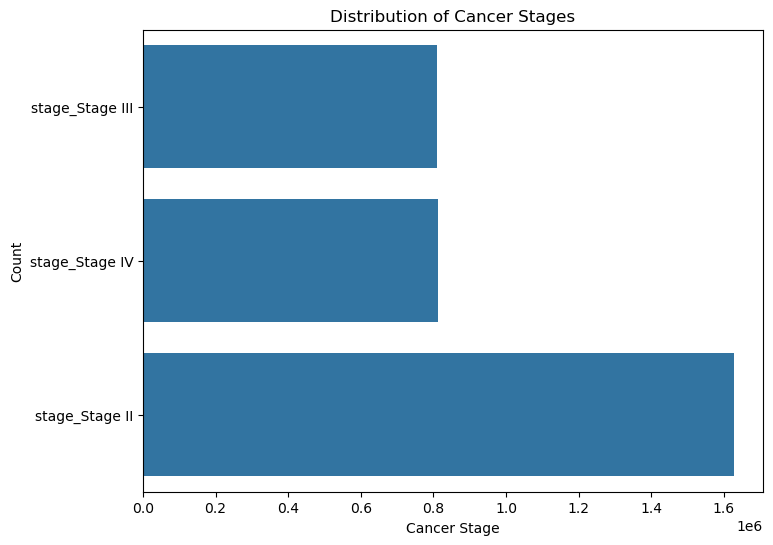

In [23]:
plt.figure(figsize=(8, 6))
sns.countplot(y)
plt.title("Distribution of Cancer Stages")
plt.xlabel("Cancer Stage")
plt.ylabel("Count")
plt.show()

In [24]:
date_columns = ['diagnosis_date', 'beginning_of_treatment_date', 'end_treatment_date']
for col in date_columns:
    if col in data.columns:  # Check if column exists
        data[col] = pd.to_datetime(data[col], errors='coerce')

In [25]:
numeric_data = data.select_dtypes(include=['number']) 

In [26]:
numeric_data 

,id,age,gender,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,survived
0,1,0.899921,0,0,2,0.072537,0.537704,0.577600,1.064628,-0.541261,-0.310683,0
1,2,-0.499908,1,1,3,-0.548619,-0.590068,0.577600,-0.939295,-0.541261,-0.310683,0
2,3,0.999909,1,0,2,-1.384790,-0.935305,-1.731301,-0.939295,-0.541261,-0.310683,0
3,4,-0.399921,0,1,1,0.490622,0.353578,0.577600,1.064628,1.847537,-0.310683,1
4,5,-1.799750,1,1,2,1.159559,0.652782,-1.731301,-0.939295,-0.541261,-0.310683,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3249995,3249996,-0.999847,1,0,0,0.060591,0.905956,0.577600,1.064628,-0.541261,-0.310683,1
3249996,3249997,-0.399921,1,1,0,1.279012,1.044050,0.577600,1.064628,-0.541261,-0.310683,0
3249997,3249998,-0.999847,1,1,0,-1.468407,-1.073399,0.577600,1.064628,-0.541261,-0.310683,0
3249998,3249999,-0.999847,1,0,3,1.159559,0.859924,0.577600,-0.939295,-0.541261,-0.310683,0


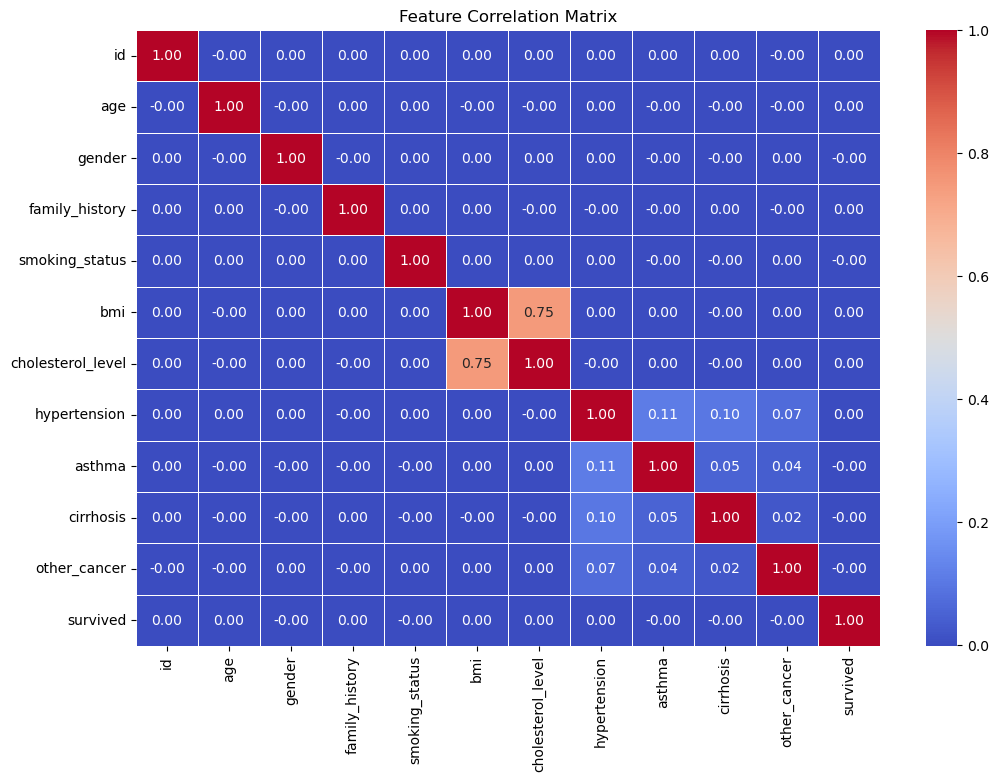

In [27]:
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()

In [28]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    print(f"{name} Accuracy: {accuracy:.4f}")

Logistic Regression Accuracy: 1.0000
Decision Tree Accuracy: 1.0000
Random Forest Accuracy: 1.0000


In [29]:
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]
print(f"\nBest Performing Model: {best_model_name} with Accuracy: {results[best_model_name]:.4f}")


Best Performing Model: Logistic Regression with Accuracy: 1.0000


In [30]:
print("\nClassification Report:")
print(classification_report(y_test, best_model.predict(X_test)))


Classification Report:
                 precision    recall  f1-score   support

 stage_Stage II       1.00      1.00      1.00    325526
stage_Stage III       1.00      1.00      1.00    162032
 stage_Stage IV       1.00      1.00      1.00    162442

       accuracy                           1.00    650000
      macro avg       1.00      1.00      1.00    650000
   weighted avg       1.00      1.00      1.00    650000



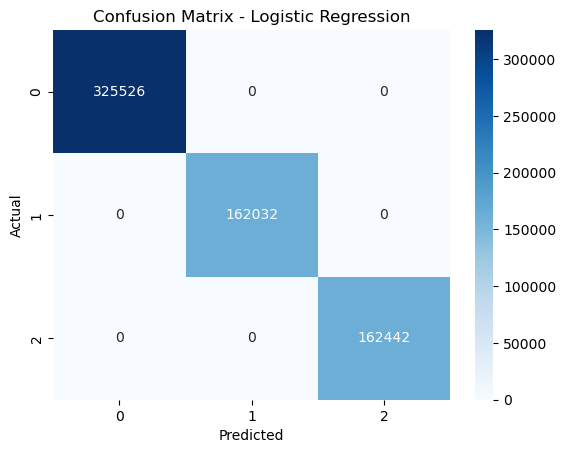

In [31]:
cm = confusion_matrix(y_test, best_model.predict(X_test))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix - {best_model_name}')
plt.show()

In [45]:
unique_classes = np.unique(y_train) 

In [47]:
unique_classes

array(['stage_Stage II', 'stage_Stage III', 'stage_Stage IV'],
      dtype=object)

In [49]:
y_test_binarized = label_binarize(y_test, classes=unique_classes)

In [51]:
y_test_binarized

array([[0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       ...,
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0]])

In [39]:
classifier = OneVsRestClassifier(LogisticRegression())
classifier.fit(X_train, y_train)
y_score = classifier.predict_proba(X_test)

In [41]:
y_score

array([[3.81915868e-04, 1.40195254e-05, 9.99604065e-01],
       [9.99415175e-01, 3.65461158e-04, 2.19364152e-04],
       [3.44079655e-04, 1.49546410e-05, 9.99640966e-01],
       ...,
       [4.16634698e-04, 1.20360820e-05, 9.99571329e-01],
       [2.45044880e-04, 9.99736308e-01, 1.86466416e-05],
       [3.65904703e-04, 9.99623712e-01, 1.03836839e-05]])

In [53]:
num_classes = y_test_binarized.shape[1]

In [55]:
num_classes

3

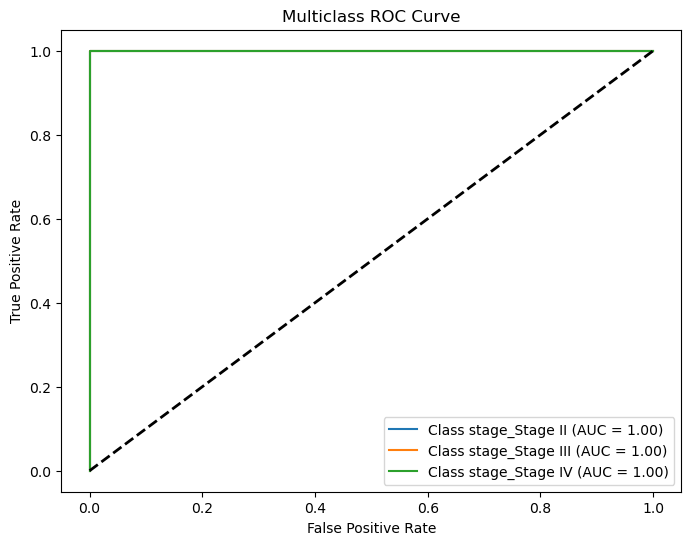

In [63]:

valid_plot = False  

plt.figure(figsize=(8, 6))
for i in range(num_classes):
    if y_test_binarized[:, i].sum() == 0:
        print(f"Skipping Class {unique_classes[i]}: No positive samples in y_test.")
        continue  # Skip classes that don't appear in y_test

    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Class {unique_classes[i]} (AUC = {roc_auc:.2f})")
    valid_plot = True  # At least one class is plotted


plt.plot([0, 1], [0, 1], 'k--', lw=2)

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multiclass ROC Curve")


if valid_plot:
    plt.legend(loc="lower right")
else:
    print("No valid classes available for ROC curve.")

plt.show()


In [65]:
st.title("Lung Cancer Stage Prediction")

age = st.number_input("Age", min_value=20, max_value=100, value=50)
gender = st.selectbox("Gender", ["Male", "Female"])
smoking = st.selectbox("Smoking Status", ["Yes", "No"])
bmi = st.number_input("BMI", min_value=10.0, max_value=50.0, value=25.0)
cholesterol = st.number_input("Cholesterol Level", min_value=100, max_value=300, value=180)

gender_encoded = 1 if gender == "Male" else 0
smoking_encoded = 1 if smoking == "Yes" else 0

if st.button("Predict Cancer Stage"):
    input_data = np.array([age, gender_encoded, smoking_encoded, bmi, cholesterol]).reshape(1, -1)
    input_scaled = scaler.transform(input_data)
    prediction = best_model.predict(input_scaled)[0]
    st.write(f"Predicted Cancer Stage: {prediction}")

2025-02-10 16:10:04.773 
  command:

    streamlit run C:\Users\buset\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
